# Importing packages for general dataset preparation and graph plots
---

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import roc_curve

# Reading the dataset into a DataFrame
___

In [134]:
data_url = 'https://raw.githubusercontent.com/Customer-Churn-Prediction/Project-Machine-Learning/master/Churning.csv'
data = pd.read_csv(data_url)
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


# Plotting a graph to show the amount customer churn in each state
___

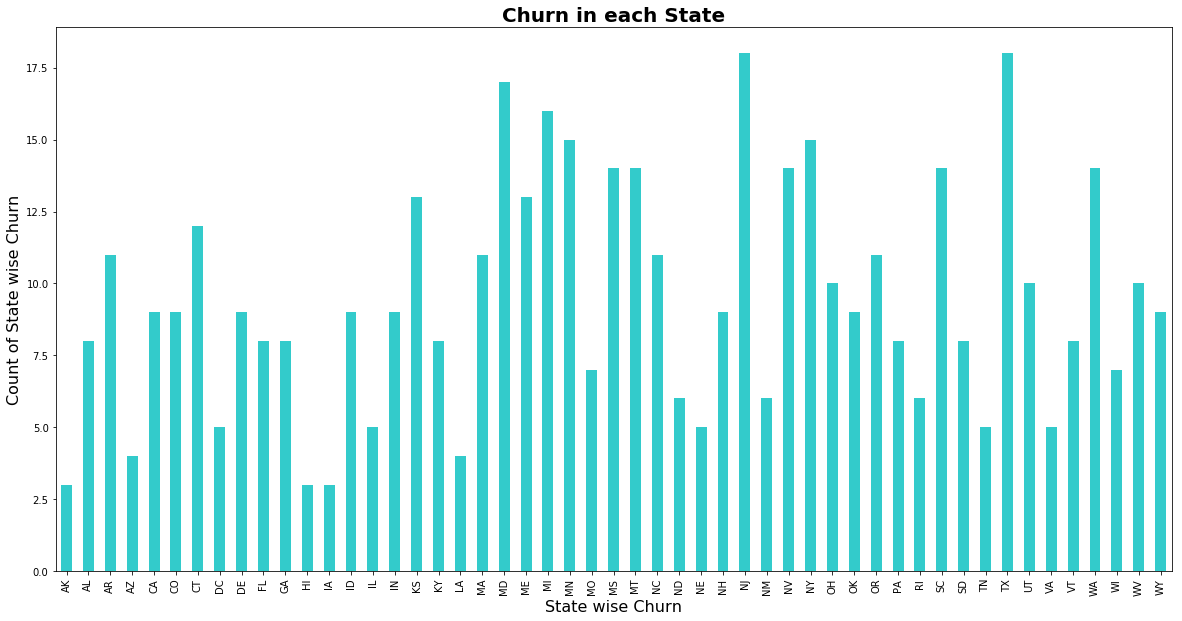

In [135]:
# selecting the states where churn is True or in this case 1
state_churn=data.query('Churn==1').groupby(['State']).size()

# plotting a bar graph to show the churn
state_churn.plot(kind='bar', alpha=0.8, color='c', figsize=(20,10))
plt.title('Churn in each State', fontsize=20,fontweight='bold')
plt.xlabel('State wise Churn', fontsize=16)
plt.ylabel('Count of State wise Churn', fontsize=16)
plt.show()

# Dataset preparation
___

In [136]:
# storing the target in another variable
target = np.array(data.Churn)

# dropping the target column: 'Churn' from the original dataset
# dropping unwanted columns: 'State','Area Code' and 'Phone' to increase the accuracy
data = data.drop(['Churn','State','Area Code','Phone'], axis = 1)
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [137]:
# Performing K Fold cross-validation 
# Although test_train split is the more generic method of splitting
# the data into train and test sets, it posesess a drawback in the form of data
# loss,i.e, a data once used for test set cannot be utilised for train set.
# K-Fold Cross Validation removes this drawback and splits the data without
# any loss of data
data_matrix=data.as_matrix()
kf = KFold(n_splits=4)
kf.get_n_splits(data)

for train_index, test_index in kf.split(data):
    train_x, test_x = data_matrix[train_index], data_matrix[test_index]
    train_y, test_y = target[train_index], target[test_index]

In [138]:
# printing the result obtained from the K Fold Cross-Validation
print(len(test_y))
print(len(train_y))

833
2500


In [139]:
# extracting all the column names in a Pandas.Index variable called features
features=data.columns[:18]
features

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Int'l Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge'],
      dtype='object')

# Applying the Random Forest Classifier on the dataset
___

In [140]:
# importing from scikit learn
from sklearn.ensemble import RandomForestClassifier

# creating an object of Random Forest Classifier
clf = RandomForestClassifier(n_jobs=2,random_state=0)

In [141]:
# fitting the classifier with training data and predicting on the test data
pred_rfc = clf.fit(train_x,train_y).predict(test_x)

In [142]:
# To check how much confident is the classifier of the test data
proba_rfc = clf.predict_proba(test_x)
proba_rfc

array([[ 0.9,  0.1],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       ..., 
       [ 0.9,  0.1],
       [ 0.8,  0.2],
       [ 0.7,  0.3]])

In [143]:
# creating the confusion matrix and displaying it as a dataframe
confusion_rfc = pd.crosstab(np.array(test_y),preds, rownames=['Actual Churn'], colnames=['Predicted Churn'])
confusion_rfc

Predicted Churn,0,1
Actual Churn,,
0,696,1
1,48,88


In [144]:
# listing the importance of each feature
imp_rfc = list(zip(clf.feature_importances_,features))

In [145]:
#showing the feature importances as a dataframe
feature_importances=pd.DataFrame(columns=['importance','labels'], data=imp_rfc)
feature_importances

,importance,labels
0,0.028607,Account Length
1,0.024239,VMail Message
2,0.097531,Day Mins
3,0.062818,Eve Mins
4,0.046326,Night Mins
5,0.049395,Intl Mins
6,0.127275,CustServ Calls
7,0.058677,Int'l Plan
8,0.033345,VMail Plan
9,0.028743,Day Calls


,importance,labels
10,0.164849,Day Charge
6,0.127275,CustServ Calls
2,0.097531,Day Mins
12,0.076910,Eve Charge
15,0.063806,Intl Calls


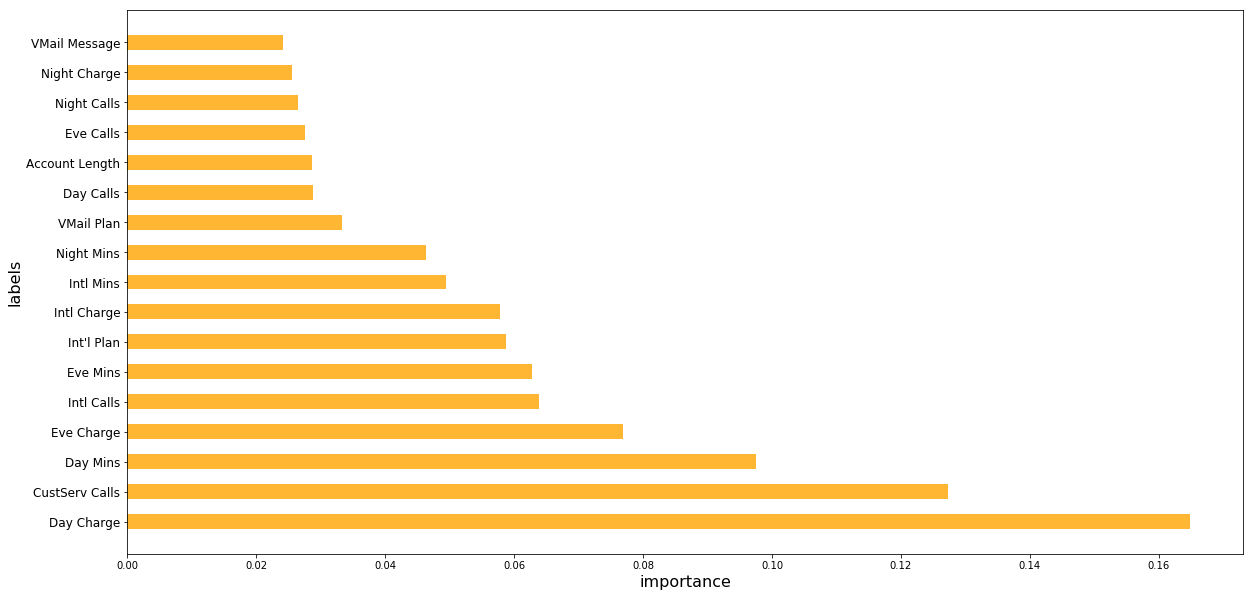

In [146]:
#plotting a graph on the basis of importance of each feature
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
feature_importances.sort_values("importance", inplace=True, ascending=False)
display(feature_importances.head())

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , feature_importances["importance"], bar_width, alpha=0.8, color='orange', label='Main')
plt.yticks(index, feature_importances["labels"], fontsize = 12)
plt.xlabel('importance', fontsize = 16)
plt.ylabel('labels', fontsize = 16)
plt.show()

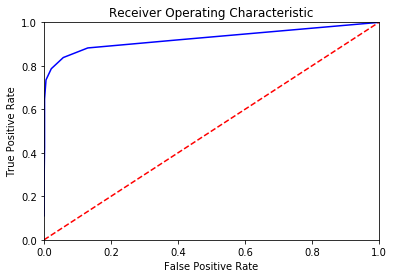

In [147]:
# plotting the ROC curve(Reciever Operating Characterestic) for Random Forest Classifier between fpr and tpr
# fpr:false positive rate
# tpr:true positive rate
fpr, tpr, threshold = roc_curve(test_y,proba_rfc[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [148]:
#calculating accuracy of RandomForestClassifier
from sklearn.metrics import accuracy_score
acc_rfc = accuracy_score(test_y, pred_rfc)
print('Accuracy of Random Forest Classifier:', acc_rfc)

Accuracy of Random Forest Classifier: 0.941176470588


# Applying Gaussian Naive Bayes Classifier
___

In [149]:
# importing from scikit learn
from sklearn.naive_bayes import GaussianNB

# creating an object of Gaussian Naive Bayes
gnb=GaussianNB()

In [150]:
# fitting the classifier with training data and predicting on the test data
pred_gnb = gnb.fit(train_x, train_y).predict(test_x)

In [151]:
# to check how much confident is the classifier of the test data
proba_gnb = gnb.predict_proba(test_x)

In [152]:
# creating the confusion matrix for GaussianNB and displaying it as a dataframe
confusion_gnb = pd.crosstab(test_y, pred_gnb, rownames=['Actual Churn'], colnames=['Predicted Churn'])
confusion_gnb

Predicted Churn,0,1
Actual Churn,,
0,644,53
1,61,75


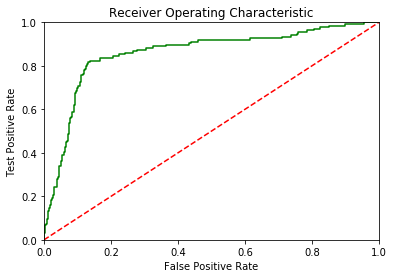

In [153]:
# plotting the ROC curve(Reciever Operating Characterestic) for GaussianNB between fpr and tpr
# fpr:false positive rate
# tpr:true positive rate
fpr, tpr, threshold = roc_curve(test_y, proba_gnb[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('Test Positive Rate')
plt.show()

In [154]:
# calculating accuracy of GaussianNB
acc_gnb = accuracy_score(test_y, pred_gnb)
print('Accuracy of Gaussian Naive Bayes:', acc_gnb)

Accuracy of Gaussian Naive Bayes: 0.863145258103


# Applying k-Nearest Neighbors Classifier
___

In [155]:
# importing from scikit learn
from sklearn.neighbors import KNeighborsClassifier

# creating an object of K-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)

In [156]:
# fitting the classifier with training data and predicting on the test data
pred_knn = knn.fit(train_x, train_y).predict(test_x)

In [157]:
# to check how much confident is the classifier of the test data
proba_knn = knn.predict_proba(test_x)

In [158]:
# creating the confusion matrix for KNeighborsClassifier and displaying it as a dataframe
confusion_knn = pd.crosstab(test_y, pred_knn, rownames=['Actual Churn'], colnames=['Predicted Churn'])
confusion_knn

Predicted Churn,0,1
Actual Churn,,
0,682,15
1,96,40


In [159]:
scores = cross_val_score(knn, train_x, train_y, cv=10, scoring='accuracy')

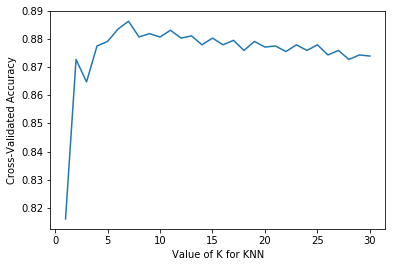

In [160]:
# plotting graph for KNN classifier
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_x, train_y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

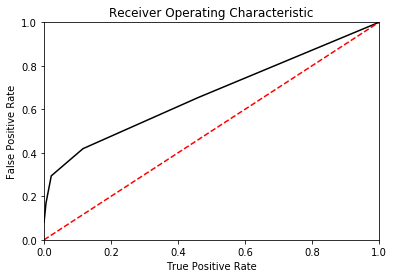

In [161]:
# plotting the ROC curve(Reciever Operating Characterestic) for KNN Classifier between fpr and tpr
# fpr:false positive rate
# tpr:true positive rate
fpr, tpr, threshold = roc_curve(test_y, proba_knn[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'k')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

In [162]:
#calculating accuracy for KNN classifier
acc_knn = accuracy_score(test_y, pred_knn)
print('Accuracy of KNN classifier:', acc_knn)

Accuracy of KNN classifier: 0.866746698679


# Plotting a bar graph of accuracies of the three classifier models

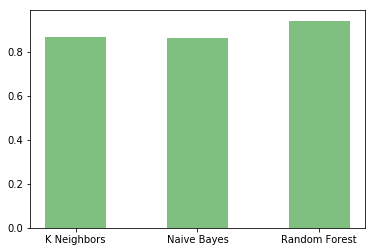

In [163]:
models = ['Random Forest', 'Naive Bayes', 'K Neighbors']
accuracies = [acc_rfc, acc_gnb, acc_knn]
plt.bar(models, accuracies, width=0.5, color='g', alpha=0.5)
plt.show()